In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df=pd.read_csv('leetcode_dataset - lc.csv')
pd.set_option('display.max_columns',None)
df.head()

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1825 non-null   int64  
 1   title              1825 non-null   object 
 2   description        1825 non-null   object 
 3   is_premium         1825 non-null   int64  
 4   difficulty         1825 non-null   object 
 5   solution_link      987 non-null    object 
 6   acceptance_rate    1825 non-null   float64
 7   frequency          1825 non-null   float64
 8   url                1825 non-null   object 
 9   discuss_count      1825 non-null   int64  
 10  accepted           1825 non-null   object 
 11  submissions        1825 non-null   object 
 12  companies          1749 non-null   object 
 13  related_topics     1571 non-null   object 
 14  likes              1825 non-null   int64  
 15  dislikes           1825 non-null   int64  
 16  rating             1825 

# Data Cleaning

In [94]:
# Drop 'id','url' and solution_link
df.drop(['id','url','solution_link'],axis=1,inplace=True)
df.head()

,title,description,is_premium,difficulty,acceptance_rate,frequency,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,46.7,100.0,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,35.7,93.1,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,31.5,90.9,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,31.4,86.2,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
4,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,30.6,84.7,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


In [110]:
# Replacing the missing values
df['companies']=df['companies'].fillna('0')
df['companies']

0       Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...
1       Bloomberg,Microsoft,Amazon,Google,Facebook,App...
2       Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...
3       Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...
4       Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...
                              ...                        
1820                                               Google
1821                                            Microsoft
1822                                            Bloomberg
1823                                              Pony.ai
1824                                               Google
Name: companies, Length: 1825, dtype: object

In [109]:
# Replacing the missing values
df['related_topics']=df['related_topics'].fillna('0')
df['related_topics']

0                                    Array,Hash Table
1                          Linked List,Math,Recursion
2       Hash Table,Two Pointers,String,Sliding Window
3              Array,Binary Search,Divide and Conquer
4                          String,Dynamic Programming
                            ...                      
1820                                                0
1821                                             Math
1822                                            Array
1823         Dynamic Programming,Breadth-first Search
1824                                Heap,Design,Queue
Name: related_topics, Length: 1825, dtype: object

# EDA

# How many premium questions?

In [95]:
print('Number of Premium questions:{}'.format(df['is_premium'].sum()))
print('Proportion of Premium questions:{}'.format(round(df['is_premium'].sum()/df.shape[0],1)))

Number of Premium questions:398
Proportion of Premium questions:0.2


In [96]:
# Change the data type inorder to plot a boxplot
df['premium']=df['is_premium'].astype('category')
df['premium']

0       0
1       0
2       0
3       0
4       0
       ..
1820    1
1821    0
1822    0
1823    0
1824    0
Name: premium, Length: 1825, dtype: category
Categories (2, int64): [0, 1]

- Hypothesis: Premium Questions might have a higher frequency thats why they are premium
- frequency is a feature which tells us about the how frequently a particular problem is being tested thus more important in interview clearing process

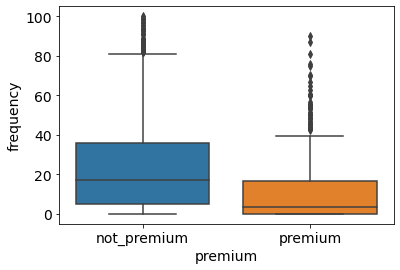

In [97]:
ax=sns.boxplot(data=df,x='premium',y='frequency')
ax.set_xticklabels(['not_premium','premium'])
plt.show()

My Hypothesis was wrong as evidenced by the boxplot

### How many questions were asked by FAANG ?


Number of questions asked by FAANG:1225


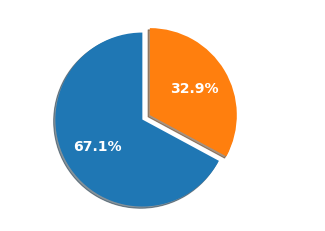

<Figure size 720x720 with 0 Axes>

In [98]:
num=df['asked_by_faang'].sum()
print('Number of questions asked by FAANG:{}'.format(num))
counts=df['asked_by_faang'].value_counts(normalize=True)
label=['FAANG','Not FAANG']
explode=[0.1,0]
plt.pie(counts,startangle=90,labels=label,shadow=True,explode=explode,autopct='%1.1f%%',textprops={'size':14,'color':'white','weight':'bold'})
plt.figure(figsize=(10,10))

plt.show()

## Questions by difficulty in FAANG

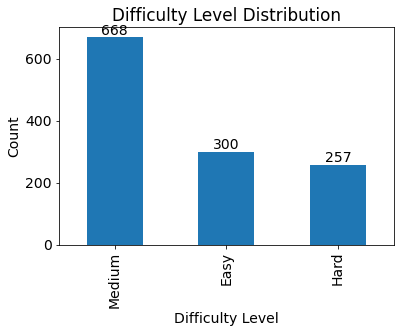

In [99]:
ax=df[df['asked_by_faang']==1]['difficulty'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
# set labels and title
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.title('Difficulty Level Distribution')

# show the plot
plt.show()    

## Distribution of Acceptance_Rate by difficulty

- Hypothesis: Easy questions will have higher acceptance rate than hard questions

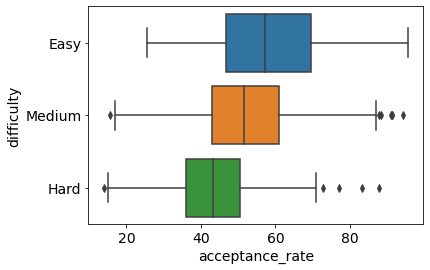

In [100]:
df_faang=df[df['asked_by_faang']==1]
sns.boxplot(data=df_faang,y='difficulty',x='acceptance_rate')
plt.show()

- As you can see from the boxplot the median acceptance_rate of hard and easy problems a significant difference

## Distribution of Likes and Dislikes by Acceptance_Rate

- Hypothesis:likes of easier problem should be higher than the likes of harder problem difficulty

- Hypothess: Dislikes of hard problems should be higher than the dislikes of easier problems

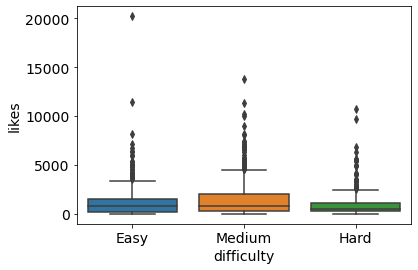

<Figure size 720x1008 with 0 Axes>

In [101]:
sns.boxplot(data=df_faang,y='likes',x='difficulty')
plt.figure(figsize=(10,14))
plt.show()

In [102]:
# The table is showing the median values of likes
pd.pivot_table(data=df_faang,index='difficulty',values='likes',aggfunc='median')

,likes
difficulty,
Easy,798.5
Hard,548.0
Medium,802.5


- My Hypothesis concerniing likes turns out to be true

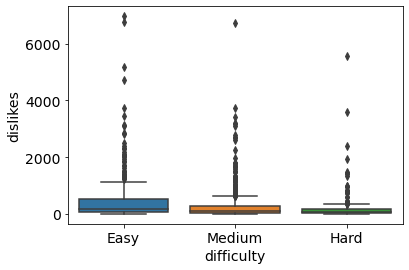

<Figure size 720x1008 with 0 Axes>

In [103]:
sns.boxplot(data=df_faang,y='dislikes',x='difficulty')
plt.figure(figsize=(10,14))
plt.show()

In [104]:
# The table is showing the median values of dislikes
pd.pivot_table(data=df_faang,index='difficulty',values='dislikes',aggfunc='median')

,dislikes
difficulty,
Easy,159.5
Hard,68.0
Medium,118.5


- My Hypothesis is dead wrong, it turns out harder problems have less dislikes than easier problems

- Another interesting insight is The number of likes:2149 and dislikes:346
- About 6 times people were more likely to Rate a like rather than a dislike

'rating' Feature of the Dataset
- Users can rate the problems after they have solved them, and the ratings are used to provide feedback to the LeetCode team on the quality and difficulty level of the problems.
- Hypothesis: Sice there is a certain problem that I dislike,it's quite probable I will not give a High Rating thus there should be some neagtive correlation of 'dislikes' and 'rating'
- Hypothesis:And a positive correlation between 'likes' and 'rating 

In [105]:
df_faang[['likes','dislikes','rating']].corr()

,likes,dislikes,rating
likes,1.000000,0.152527,0.294859
dislikes,0.152527,1.000000,-0.562773
rating,0.294859,-0.562773,1.000000


- My hypothesis is correct

In [106]:
df_faang[['likes','dislikes','acceptance_rate']].corr()

,likes,dislikes,acceptance_rate
likes,1.000000,0.152527,-0.163426
dislikes,0.152527,1.000000,-0.234282
acceptance_rate,-0.163426,-0.234282,1.000000


# Distribution of Frequency FAANG vs Non_FAANG

- Hypthesis:Faang questions have a higher frequency

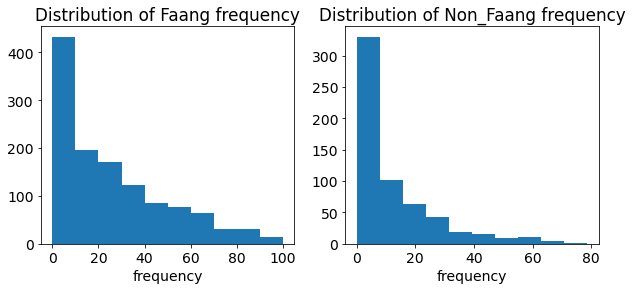

In [107]:
non_faang=df[df['asked_by_faang']==0]
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].hist(df_faang['frequency'],bins=10)
ax[0].set_title('Distribution of Faang frequency')
ax[0].set_xlabel('frequency')
ax[1].hist(non_faang['frequency'],bins=10)
ax[1].set_title('Distribution of Non_Faang frequency')
ax[1].set_xlabel('frequency')
plt.show()

- Hypothesis is wrong as distributions are very similiar

# Discuss_count vs difficulty

- Hypothesis:Discuss_count of medium questions would be the highest as the interviews usually have medium questions and acing them is a good KPI for will you pass the round or not

<AxesSubplot:xlabel='difficulty', ylabel='discuss_count'>

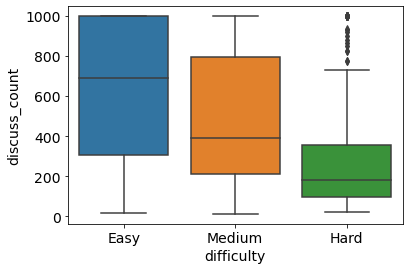

In [108]:
sns.boxplot(data=df_faang,x='difficulty',y='discuss_count')

- My hypothesis was wrong. It's the easy problem type that is discussed more

# Top 5 Companies Problems by count

In [112]:
count_of_companies={}
for companies in df['companies']:
    for company in companies.split(','):
        if company not in count_of_companies:
            count_of_companies[company]=1
        else:
            count_of_companies[company]+=1
print(count_of_companies)            

{'Amazon': 690, 'Google': 553, 'Apple': 211, 'Adobe': 119, 'Microsoft': 355, 'Bloomberg': 220, 'Facebook': 411, 'Oracle': 113, 'Uber': 112, 'Expedia': 27, 'Twitter': 43, 'Nagarro': 2, 'SAP': 8, 'Yahoo': 21, 'Cisco': 23, 'Qualcomm': 10, 'tcs': 6, 'Goldman Sachs': 70, 'Yandex': 25, 'ServiceNow': 6, 'Paypal': 26, 'Coupang': 7, 'VMware': 23, 'eBay': 53, 'Alation': 1, 'ByteDance': 107, 'Salesforce': 17, 'Splunk': 6, 'Spotify': 9, 'Zillow': 11, 'Flipkart': 12, 'Wayfair': 13, 'American Express': 5, 'Intel': 5, 'Coursera': 2, 'Roblox': 21, 'LinkedIn': 68, 'Qualtrics': 22, 'Tesla': 13, 'Twilio': 8, 'Capital One': 13, 'JPMorgan': 18, 'Morgan Stanley': 6, 'Samsung': 10, 'IBM': 12, 'Intuit': 18, 'Atlassian': 8, 'Walmart Labs': 19, 'Nvidia': 13, 'Databricks': 8, 'Wish': 14, 'Palantir Technologies': 8, 'Rubrik': 8, 'C3 IoT': 6, 'Snapchat': 23, 'DoorDash': 17, 'Pinterest': 11, 'Epic Systems': 3, 'Airbnb': 17, 'Citadel': 16, 'Square': 11, 'Two Sigma': 8, 'Quora': 8, 'PayTM': 2, 'Affirm': 3, 'Docusign'

In [117]:
top_5_name=[]
top_5_cnt=[]
for company_name,cnt in sorted(count_of_companies.items(),key=lambda x:x[1],reverse=True):
     top_5_name.append(company_name)
     top_5_cnt.append(cnt)

In [120]:
top_5_name=top_5_name[:5]
top_5_cnt=top_5_cnt[:5]
top_5_name

['Amazon', 'Google', 'Facebook', 'Microsoft', 'Bloomberg']

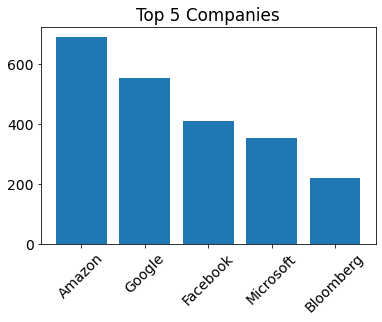

In [122]:
plt.bar(top_5_name,top_5_cnt)
plt.title('Top 5 Companies')
plt.xticks(rotation=45)
plt.show()

# Questions are related to which topics

In [125]:
que={}
for categories in df['related_topics']:
    for topic in categories.split(','):
        if topic not in que:
            que[topic]=1
        else:
            que[topic]+=1

            
print('How many different topics:{}'.format(len(que)))            

How many different topics:44


In [127]:
top_10_topics=[]
top_10_val=[]
for topic,val in sorted(que.items(),key=lambda x:x[1],reverse=True):
    top_10_topics.append(topic)
    top_10_val.append(val)
top_10_topics=top_10_topics[:10]
top_10_val=top_10_val[:10]
top_10_val

[305, 254, 248, 221, 192, 156, 155, 149, 144, 102]

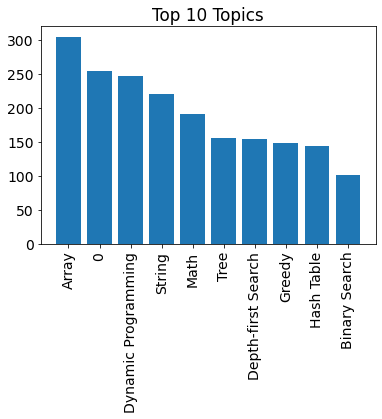

In [129]:
plt.bar(top_10_topics,top_10_val)
plt.title('Top 10 Topics')
plt.xticks(rotation=90)
plt.show()

- Hypothesis:Hard probelms would have different topics than easy problem types

In [144]:
df_hard=df[df['difficulty']=='Hard']
ques={}
for categories in df_hard['related_topics']:
    for topic in categories.split(','):
        if topic not in ques:
            ques[topic]=1
        else:
            ques[topic]+=1
y=sorted(ques.items(),key=lambda x:x[1],reverse=True)[:5]
print(y)

[('Dynamic Programming', 123), ('Math', 49), ('String', 38), ('0', 37), ('Binary Search', 32)]


In [142]:
df_easy=df[df['difficulty']=='Easy']
quest={}
for categories in df_hard['related_topics']:
    for topic in categories.split(','):
        if topic not in quest:
            quest[topic]=1
        else:
            quest[topic]+=1
x=sorted(quest.items(),key=lambda x:x[1],reverse=True)[:5]
print(x)

[('Array', 122), ('0', 112), ('String', 74), ('Math', 52), ('Hash Table', 49)]


- Array seems to be like an easy topic
- Dynamic programming seems to be a complex concept